# Load Decryption Key

In [1]:
import io

from PIL import Image

from image import align_and_crop_face

2023-12-11 03:10:28.198560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


b'SyljEyYt2GE3LTNOTnkIpnYMLcQwxtOf4DPiN1R0W_A='


# Connect to DB and access user data

Registered Users: ['armaan', 'bob', 'alice']
1/1 [==============================] - 0s 63ms/step


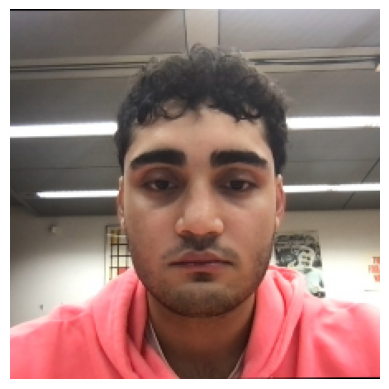

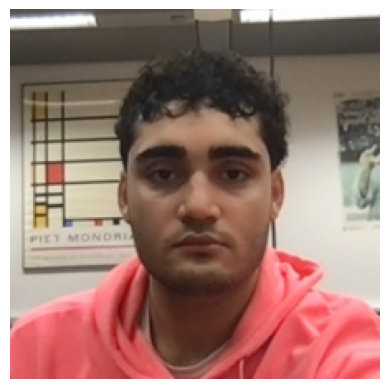

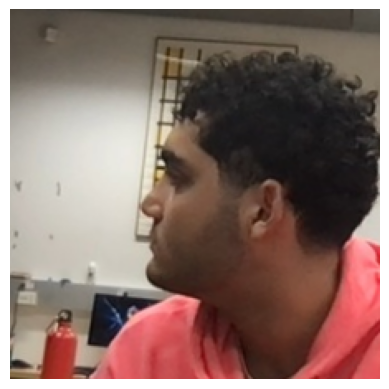

In [2]:
images = get_face_by_username('alice')

In [3]:
from embedding import get_embedding_from_face, verify_face

In [5]:

alice_embedding = get_embedding_from_face(images[0])
    

In [11]:
# Read the image file
with open("misc/aryan.png", "rb") as f:
    decrypted_image = f.read()

# Load the image with PIL and convert to RGB
image_bytes = io.BytesIO(decrypted_image)
mallory_image = Image.open(image_bytes).convert("RGB")

In [12]:
mallory_embedding = get_embedding_from_face(mallory_image)

In [13]:
mallory_embedding.shape

(1, 512)

In [14]:
print(verify_face(mallory_embedding, alice_embedding))

False
